## More Image Processing

In [7]:
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

__Load image__

In [15]:
image = cv2.imread(os.path.join("..", "data", "img", "terasse.jpeg"))

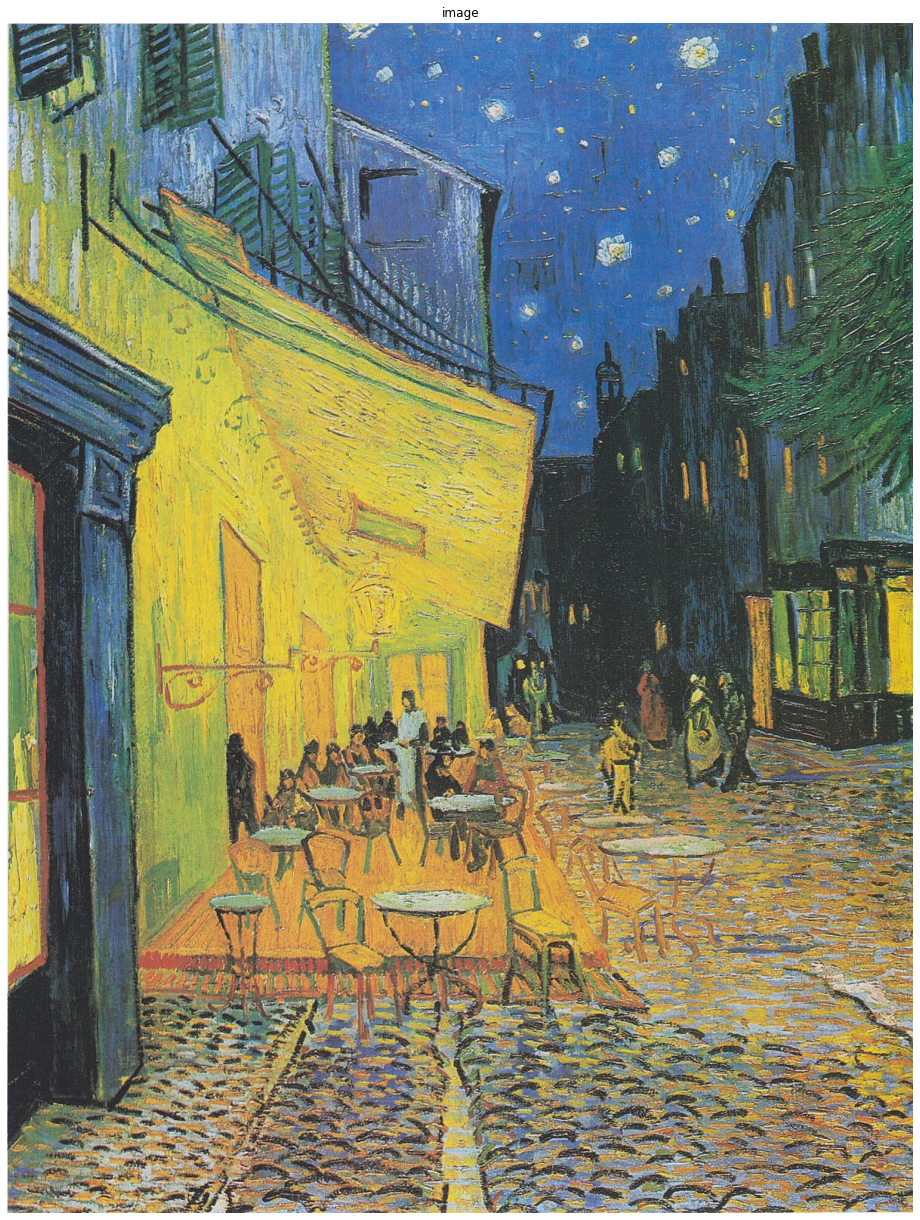

In [16]:
jimshow(image, "image")

## Plot Color Histogram

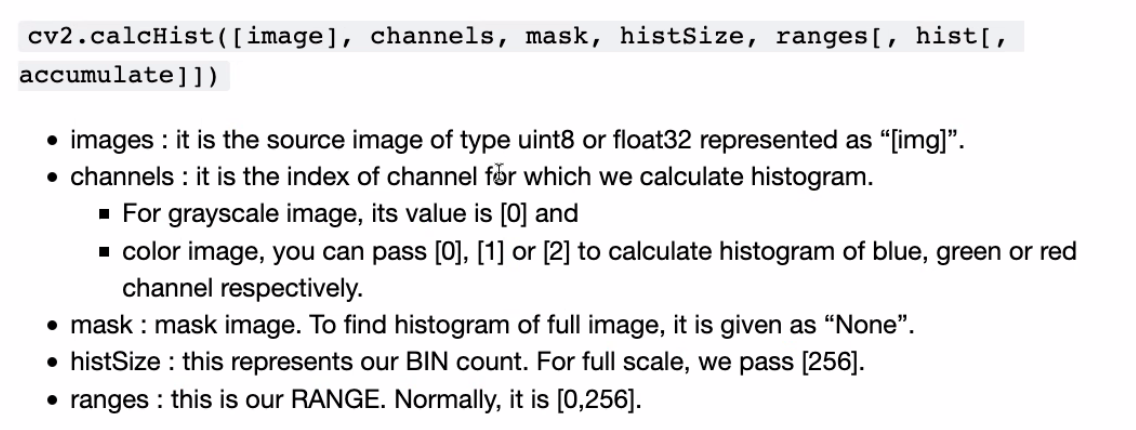

We are going to use this function: <br> cv2.calcHist([image], channels, mask, histSize, ranges[, hist[,accumulate]])

channels = the particular channel you want to plot (its index)
<br> NB! If we are working with a greyscale image, the channels argument should be 0. Hence, when we only have one channel the channels argument should be set to 0.

size = the number of bins of the image

mask = allows us to mask the image and focus on a particular area

range = the full range of possible values





__Plot the blue channel__

In [19]:
hist_blue = cv2.calcHist([image], [0], None, [256], [0,256]) # Channel = 0 because the blue channel is the first index

Now we can use a matplotlib function to plot the color histogram we have just created:

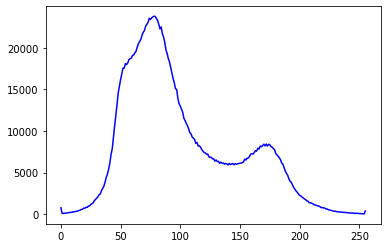

In [20]:
plt.plot(hist_blue, color = "Blue")

__Plot the green channel__

In [24]:
hist_green = cv2.calcHist([image], [1], None, [256], [0,256])

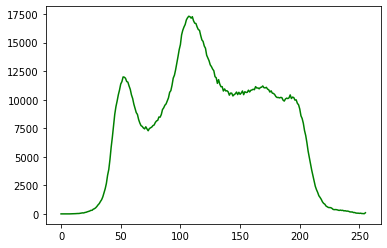

In [28]:
plt.plot(hist_green, color = "Green")

__Plot the red channel__

In [30]:
hist_red = cv2.calcHist([image], [2], None, [256], [0,256])

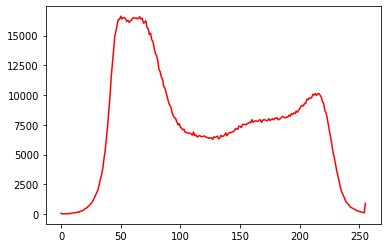

In [31]:
plt.plot(hist_red, color = "Red")

__Split channels__

We want the channels in a single histogram which makes more sense, because we can see how they overlap. 

We need to create a for loop that goes through each channel


In [32]:
# Splitting the image and assigning each split to a individual channel
(BLUE, GREEN, RED) = cv2.split(image)

In [ ]:
# Making a new histogram just for the blue channel
hist = cv2.calcHist([BLUE], [0], None, [256], [0,256])
plt.plot(hist, "Blue")
# Now we have a function we can call on whatever channel we want
# Now we can iterate over the channels more conveniently

## Plot Multiple Channels At Once

Take an image and split it into channels and plot it in the same histogram

Text(0, 0.5, 'Number of pixels')

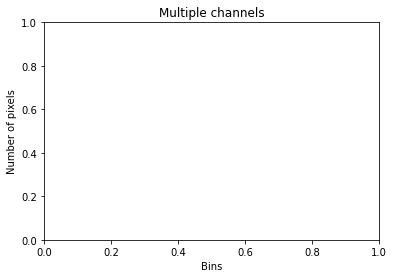

In [40]:
# Split channels
# We are assigning the channels to a single variable
channels = cv2.split(image)

# Create a tuple variable that contains the names of colors
color_names = ("b", "g", "r")
# We can use this list of colors to fed into the plot function and specify the color we want

# Create a figure in which we are going to add stuff to
plt.figure() # figure
plt.title("Multiple channels") # title
plt.xlabel("Bins") # x-label
plt.ylabel("Number of pixels") # y-label

In [35]:
type(channels)

list

In [36]:
channels
# Here we can see that "channels" is a list of arrays

[array([[239, 238, 224, ...,  99,  95, 100],
        [244, 240, 149, ..., 110,  96,  80],
        [228, 237, 152, ..., 106,  98,  83],
        ...,
        [206, 168, 173, ..., 142, 137, 147],
        [214, 182, 178, ..., 103, 123, 144],
        [205, 147, 168, ..., 186, 194, 186]], dtype=uint8),
 array([[232, 237, 239, ...,  75,  77,  86],
        [237, 240, 160, ...,  86,  78,  66],
        [222, 234, 159, ...,  84,  82,  70],
        ...,
        [209, 171, 175, ..., 192, 187, 197],
        [233, 201, 198, ..., 151, 171, 192],
        [232, 174, 195, ..., 233, 241, 233]], dtype=uint8),
 array([[229, 233, 231, ...,  55,  60,  68],
        [234, 234, 152, ...,  68,  61,  48],
        [217, 229, 152, ...,  66,  65,  54],
        ...,
        [187, 149, 153, ..., 220, 215, 225],
        [224, 192, 186, ..., 169, 189, 210],
        [229, 170, 191, ..., 247, 255, 247]], dtype=uint8)]

Now we want to iterate over the list of channels
Hence, we want to join the color names to the channels
For this we are going to use a very useful function called "zip"
The zip() function takes two lists (sequences) of equal length and merges them together


__Example of how the zip function works__

In [41]:
list1 = [0, 1, 2, 3]
list2 = [4, 5, 6, 7]

In [45]:
print(list(zip(list1, list2)))
# Now we have created a single list of tuples.
# It has merged the elements in the lists together - each element is a tuple of the element from list 1 and an element from list 2

[(0, 4), (1, 5), (2, 6), (3, 7)]


We can zip together channels and color names using zip()

In [47]:
list(zip(channels, color_names))
# Now we have a list of arrays
# We can see that the arrays have names

[(array([[239, 238, 224, ...,  99,  95, 100],
         [244, 240, 149, ..., 110,  96,  80],
         [228, 237, 152, ..., 106,  98,  83],
         ...,
         [206, 168, 173, ..., 142, 137, 147],
         [214, 182, 178, ..., 103, 123, 144],
         [205, 147, 168, ..., 186, 194, 186]], dtype=uint8),
  'b'),
 (array([[232, 237, 239, ...,  75,  77,  86],
         [237, 240, 160, ...,  86,  78,  66],
         [222, 234, 159, ...,  84,  82,  70],
         ...,
         [209, 171, 175, ..., 192, 187, 197],
         [233, 201, 198, ..., 151, 171, 192],
         [232, 174, 195, ..., 233, 241, 233]], dtype=uint8),
  'g'),
 (array([[229, 233, 231, ...,  55,  60,  68],
         [234, 234, 152, ...,  68,  61,  48],
         [217, 229, 152, ...,  66,  65,  54],
         ...,
         [187, 149, 153, ..., 220, 215, 225],
         [224, 192, 186, ..., 169, 189, 210],
         [229, 170, 191, ..., 247, 255, 247]], dtype=uint8),
  'r')]

Now we can iterate over the list we have just created

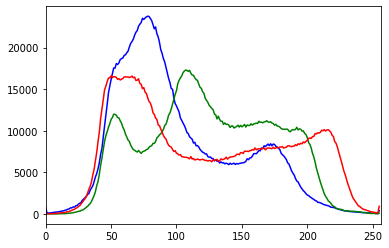

In [50]:
# loop over channels
# First line of loop: "For every channel and color name in the merged list" do this
for channel, color_name in zip(channels, color_names):
    # Create a histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256]) # we are setting the channel to 0 because we are looping over each channel individually which means that there is only one color to work with.
    # Plot histogram
    plt.plot(hist, color = color_name)
    # Set limit of x-axis which is good practice
    plt.xlim([0,256])
    
# Show the plot
plt.show()

# Now we have a histogram containing each color channel

__Comparing histograms__

In [64]:
# Creating an image
image2 = cv2.imread(os.path.join("..", "data", "img", "florence.jpg"))

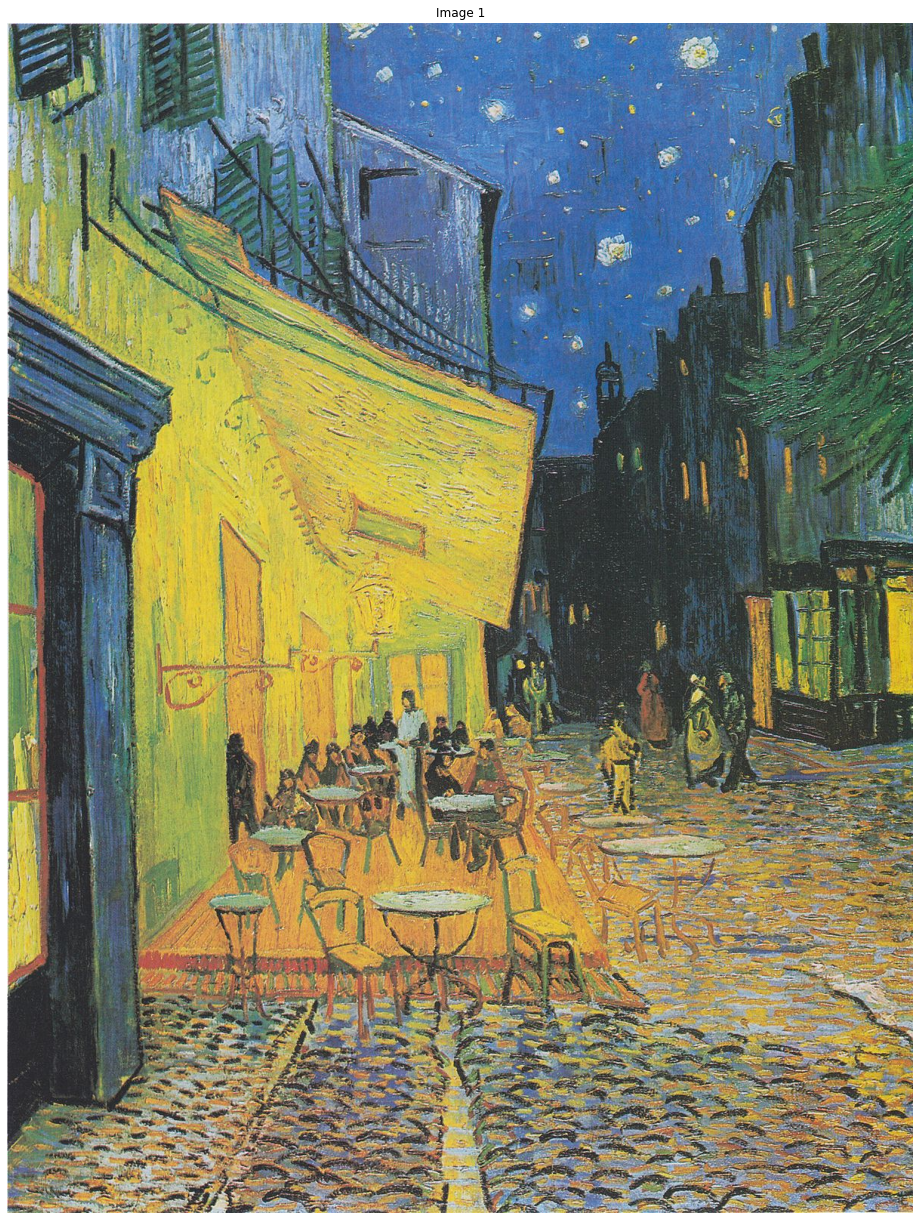

In [53]:
jimshow(image, "Image 1")

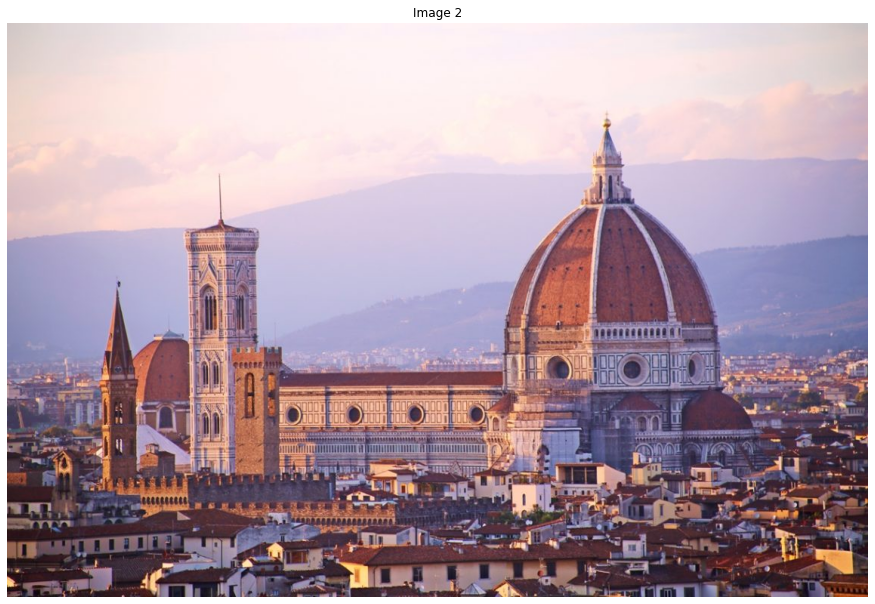

In [65]:
jimshow(image2, "Image 2")

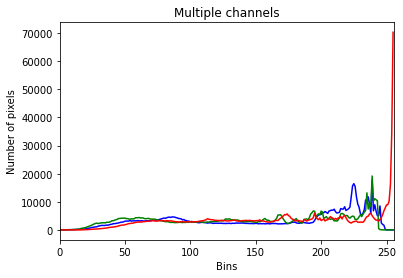

In [61]:
channels = cv2.split(image2)
color_names = ("b", "g", "r")
plt.figure() # figure
plt.title("Multiple channels") # title
plt.xlabel("Bins") # x-label
plt.ylabel("Number of pixels") # y-label
# First line of loop: "For every channel and color name in the merged list" do this
for channel, color_name in zip(channels, color_names):
    # Create a histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256]) # we are setting the channel to 0 because we are looping over each channel individually which means that there is only one color to work with.
    # Plot histogram
    plt.plot(hist, color = color_name)
    # Set limit of x-axis which is good practice
    plt.xlim([0,256])
    
# Show the plot
plt.show()


__Extract histograms__

In [68]:
# Making a histogram for the first image
# We focus on all three channels this time hence the [0,1,2]
# The bin size this time is for three channels - hence, we use 8x8x8
# Range of possible values is a series of lists of min and max values for each channel
hist1 = cv2.calcHist([image], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])

In [69]:
# Now we can do exactly the same for image2
hist2 = cv2.calcHist([image2], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])

__MinMax Normalization__

We want to compress the values into a smaller space with a normalization function to make our comparisons more robust. To do this we use the MinMix normalization. For any value in the data, we calcualte the value itself minus the minimum possible value in the dataset divided by the maximum value in the dataset minus the minimum value in the dataset. This is done for each data point (each pixel). 

MinMax Normalization is just one way of normalizing data.

(value-min) / (max-min)

In [73]:
# Normalinzing hist1
# We are taking hist1 and applying the minmax function to it
# The syntax is weird
hist1 = cv2.normalize(hist1, hist1, 0,255, cv2.NORM_MINMAX)
# why 255 and nor 256?: because we are taking the actual range of possible values

# We do the same thing for image2
hist2 = cv2.normalize(hist2, hist2, 0,255, cv2.NORM_MINMAX)


In [74]:
# Now we can calculate the distance/similarity matrix for the two histograms in order to compare them
# High similarity = small distance, low similarity = large distance
# We are comparing the histograms by comparing the distance/similarity in their distributions
# What we are doing is looking for some way of quantifying how similar the two histograms are

cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

# We use chi-squared which is a measure of distance between distributions (it is not the chi-square we know from statistics)

# The value we get as output is hard to interpret. 
# It is a chi-square value
# You should think of this number as relative - two numbers that are equal means no distance = total similar distribution. The higher the number, the larger the distance between the compared histograms. Hence, the actual value does not matter - it is a relative measure. 
# In this case we see that the difference in distance between hist1 and hist2 is very large
# If the chi-square value is 0 it means taht we are dealing with the same distribution - hence, we are dealing with the same image.

66998.49502013643

In [75]:
# Round the chi-square number
round(66998.49502013643, 2)

66998.5